In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
import sklearn.linear_model

In [4]:
data = pd.read_csv('Cars93.csv')
data.dropna()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [5]:
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]
subset_data

,Price,Horsepower,MPG.highway,Turn.circle
0,15.9,140,31,37
1,33.9,200,25,38
2,29.1,172,26,37
3,37.7,172,26,37
4,30.0,208,30,39
5,15.7,110,31,41
6,20.8,170,28,42
7,23.7,180,25,45
8,26.3,170,27,41
9,34.7,200,25,43


In [6]:
###Separo los datos que necesito para hacer los fits lineales
X1 = data['MPG.highway'].values.reshape(-1,1)
X2 = data['Turn.circle'].values.reshape(-1,1)
X3 = data['Horsepower'].values.reshape(-1,1)
Y = data['Price'].values.reshape(-1,1)
linear1 = sklearn.linear_model.LinearRegression()

0.314362468002


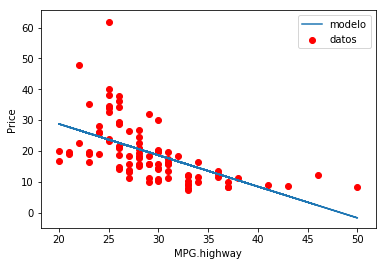

In [7]:
linear1.fit(X1,Y)
Y_predict1 = linear1.predict(X1)
plt.plot(X1, Y_predict1, label='modelo')
plt.scatter(X1, Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')
print(linear1.score(X1, Y))

0.154126850563


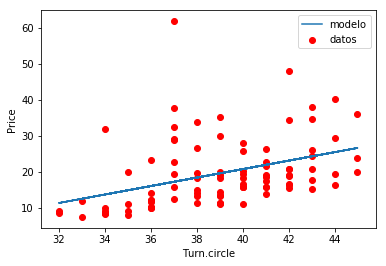

In [8]:
linear2 = sklearn.linear_model.LinearRegression()
linear2.fit(X2,Y)
Y_predict2 = linear2.predict(X2)
plt.plot(X2, Y_predict2, label='modelo')
plt.scatter(X2, Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
print(linear2.score(X2, Y))

0.621286950034


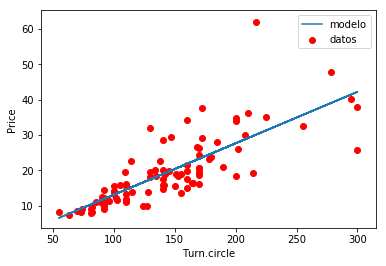

In [12]:
linear3 = sklearn.linear_model.LinearRegression()
linear3.fit(X3, Y)
Y_predict3 = linear3.predict(X3)
plt.plot(X3, Y_predict3, label='modelo')
plt.scatter(X3, Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
print(linear3.score(X3 ,Y))

In [11]:
###EJERCICO 6.2

0.629865302134


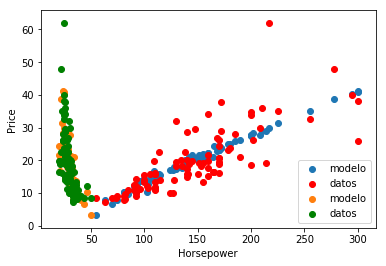

In [27]:
X4 = data[['Horsepower', 'MPG.highway']]
Y = data['Price'].values.reshape(-1,1)
linear4 = sklearn.linear_model.LinearRegression()
linear4.fit(X4,Y)
Y_predict4 = linear4.predict(X4)
plt.scatter(X4['Horsepower'], Y_predict4, label='modelo')
plt.scatter(X4['Horsepower'], Y, label='datos', color='red')
plt.scatter(X4['MPG.highway'], Y_predict4, label='modelo')
plt.scatter(X4['MPG.highway'], Y, label='datos', color='green')
plt.legend()
plt.xlabel('Horsepower')
_ = plt.ylabel('Price')
print(linear4.score(X4, Y))

0.319870822933


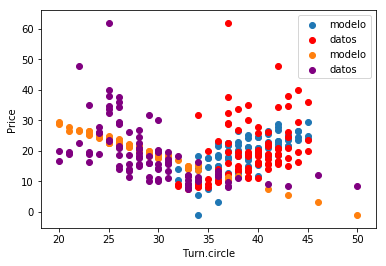

In [28]:
X5 = data[['Turn.circle', 'MPG.highway']]
Y = data['Price'].values.reshape(-1,1)
linear5 = sklearn.linear_model.LinearRegression()
linear5.fit(X5,Y)
Y_predict5 = linear5.predict(X5)
plt.scatter(X5['Turn.circle'], Y_predict5, label='modelo')
plt.scatter(X5['Turn.circle'], Y, label='datos', color='red')
plt.scatter(X5['MPG.highway'], Y_predict5, label='modelo')
plt.scatter(X5['MPG.highway'], Y, label='datos', color='purple')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
print(linear5.score(X5, Y))

0.624902917389


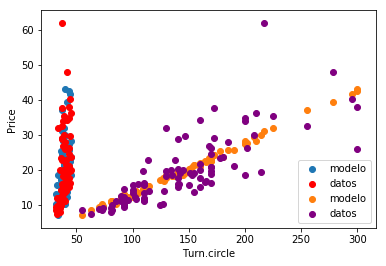

In [29]:
X6 = data[['Turn.circle', 'Horsepower']]
Y = data['Price'].values.reshape(-1,1)
linear6 = sklearn.linear_model.LinearRegression()
linear6.fit(X6,Y)
Y_predict6 = linear6.predict(X6)
plt.scatter(X6['Turn.circle'], Y_predict6, label='modelo')
plt.scatter(X6['Turn.circle'], Y, label='datos', color='red')
plt.scatter(X6['Horsepower'], Y_predict6, label='modelo')
plt.scatter(X6['Horsepower'], Y, label='datos', color='purple')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
print(linear6.score(X6, Y))

In [41]:
### Sí, el modelo  con variable Horsepower y MPG.highway es mejor que los tres de una sola variable.

0.640452321054


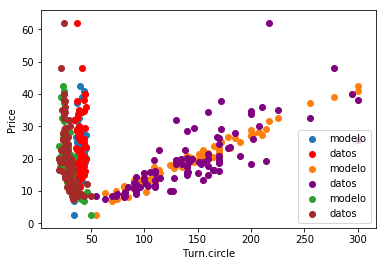

In [30]:
X7 = data[['Turn.circle', 'Horsepower', 'MPG.highway']]
Y = data['Price'].values.reshape(-1,1)
linear7 = sklearn.linear_model.LinearRegression()
linear7.fit(X7,Y)
Y_predict7 = linear7.predict(X7)
plt.scatter(X7['Turn.circle'], Y_predict7, label='modelo')
plt.scatter(X7['Turn.circle'], Y, label='datos', color='red')
plt.scatter(X7['Horsepower'], Y_predict7, label='modelo')
plt.scatter(X7['Horsepower'], Y, label='datos', color='purple')
plt.scatter(X7['MPG.highway'], Y_predict7, label='modelo')
plt.scatter(X7['MPG.highway'], Y, label='datos', color='brown')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
print(linear7.score(X7, Y))

In [47]:
### Este modelo es mejor que todos los modelos anteriores

In [50]:
### EJERCICIO 6.4

In [31]:
sigma_y = np.var(Y)
def loglikelihood(x_obs, y_obs, sigma_y, Y_predict):
    d = y_obs - Y_predict
    d = d/sigma_y
    d = -0.5 * np.sum(d**2) - np.log(np.sqrt(2*np.pi*sigma_y**2))
    return d
def monte_carlo(x_obs, y_obs, sigma_y, n, N, Y_predict):
    mc = 0
    for i in range (N):
        mc += np.sum(np.exp(loglikelihood(x_obs, y_obs, sigma_y, Y_predict)))
    return mc/N
def eval(x_obs, y_obs, sigma_y, n, N, Y_predict):
    Integral = []
    for i in range(n):
        Integral.append(monte_carlo(x_obs, y_obs, sigma_y, i, N, Y_predict))
    return Integral

print(eval(X1, Y, sigma_y, 1, 10000, Y_predict1))
print(eval(X2, Y, sigma_y, 1, 10000, Y_predict2))
print(eval(X3, Y, sigma_y, 1, 10000, Y_predict3))
print(eval(X4, Y, sigma_y, 1, 10000, Y_predict4))
print(eval(X5, Y, sigma_y, 1, 10000, Y_predict5))
print(eval(X6, Y, sigma_y, 1, 10000, Y_predict6))
print(eval(X7, Y, sigma_y, 1, 10000, Y_predict7))

#El mejor modelo es el último modelo 

[0.0030597850348420786]
[0.0028224925701511106]
[0.0035714389147678835]
[0.0035869068014139634]
[0.0030682878096330813]
[0.0035779508260229556]
[0.003606088964720729]
